In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

df=pd.read_csv('sensor_data_gtv2000000000000.gzip', compression='gzip')

df.columns


df.groupby('DeviceID')['SignalQuality'].max()

df.groupby('PatientID')['SignalQuality'].max()

df.loc[(df['PatientID'] ==5749328048029696) & (df['DeviceID'] =='SN10102019_3c9fd72d')].shape

df1=df.loc[(df['SignalQuality'] >=10)]

set(df['PatientID'])-set(df1['PatientID'])

df3=df.loc[:,['DeviceID','PatientID']].drop_duplicates(keep='first')
df3.shape

df=pd.read_csv('sensor_data_gtv2000000000000.gzip', compression='gzip')
df.head()
df.shape
df.columns
df.duplicated().sum()
df=df.drop_duplicates(subset=None, keep='first', inplace=False)
df.duplicated().sum()
df.shape
print(len(set(df['PatientID'])))
print(len(set(df['DeviceID'])))
df.describe()

In [3]:
start = time.time()
from glob import glob
filenames = glob('sensor_data_*.gzip')
dataframes = [pd.read_csv(f,compression='gzip') for f in filenames]

#timing
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


00:02:13.46


In [4]:
start = time.time()

In [5]:
for i in range(len(dataframes)):
    print(dataframes[i].shape)

(4228738, 29)
(4223272, 29)
(4227204, 29)
(4220544, 29)
(4225780, 29)
(4225607, 29)
(4224375, 29)
(4228201, 29)
(4225012, 29)
(4223492, 29)


In [6]:
for i in range(len(dataframes)):
    print(dataframes[i].isnull().sum())

SensorType                      0
Timestamp                       0
FrameCounter              4228738
StatusCode                      0
SensorState               4228738
Distance                        0
SignalQuality                   0
RespirationRate                 0
MovementSlow                    0
MovementFast                    0
DeviceID                        0
DetectionCount                  0
DetectionDistance1        4228738
DetectionCrossSection1    4228738
DetectionVelocity1        4228738
DetectionDistance2        4228738
DetectionCrossSection2    4228738
DetectionVelocity2        4228738
DetectionDistance3        4228738
DetectionCrossSection3    4228738
DetectionVelocity3        4228738
DetectionDistance4        4228738
DetectionCrossSection4    4228738
DetectionVelocity4        4228738
DetectionDistance5        4228738
DetectionCrossSection5    4228738
DetectionVelocity5        4228738
PatientID                       0
thermalPresence                 0
dtype: int64
S

SensorType                      0
Timestamp                       0
FrameCounter              4223492
StatusCode                      0
SensorState               4223492
Distance                        0
SignalQuality                   0
RespirationRate                 0
MovementSlow                    0
MovementFast                    0
DeviceID                        0
DetectionCount                  0
DetectionDistance1        4223492
DetectionCrossSection1    4223492
DetectionVelocity1        4223492
DetectionDistance2        4223492
DetectionCrossSection2    4223492
DetectionVelocity2        4223492
DetectionDistance3        4223492
DetectionCrossSection3    4223492
DetectionVelocity3        4223492
DetectionDistance4        4223492
DetectionCrossSection4    4223492
DetectionVelocity4        4223492
DetectionDistance5        4223492
DetectionCrossSection5    4223492
DetectionVelocity5        4223492
PatientID                       0
thermalPresence                 0
dtype: int64


In [7]:
for i in range(len(dataframes)):
    dataframes[i]=dataframes[i].dropna(axis=1, how='all')

In [8]:
for i in range(len(dataframes)):
    print(set(dataframes[i]['SensorType']))

{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}
{'sleep_ext'}


In [9]:
for i in range(len(dataframes)):
    dataframes[i]=dataframes[i].drop(columns=['SensorType'])

In [10]:
for i in range(len(dataframes)):
    print(len(set(dataframes[i]['PatientID'])))

27
27
27
27
27
27
27
27
27
27


In [11]:
dfs=[]
for i in range(len(dataframes)):
    dfs.append(dataframes[i].loc[:,['DeviceID','PatientID']].sort_values('PatientID').drop_duplicates(keep='first').reset_index(drop=True))
print(len(dfs))
    

10


import functools
import operator
functools.reduce(operator.eq, [dfs[0],dfs[1]])
functools.reduce(operator.eq, [dfs[1],dfs[2]])
functools.reduce(operator.eq, [dfs[2],dfs[3]])
functools.reduce(operator.eq, [dfs[3],dfs[4]])
functools.reduce(operator.eq, [dfs[4],dfs[5]])
functools.reduce(operator.eq, [dfs[5],dfs[6]])
functools.reduce(operator.eq, [dfs[6],dfs[7]])
functools.reduce(operator.eq, [dfs[7],dfs[8]])
functools.reduce(operator.eq, [dfs[8],dfs[9]])




In [12]:
pd.concat([dfs[0],dfs[1],dfs[3],dfs[4],dfs[4], dfs[5],dfs[6],dfs[7],dfs[8],dfs[9]]).drop_duplicates(keep='first').reset_index(drop=True)


,DeviceID,PatientID
0,SN10102019_5aa56eee,5634263223369728
1,SN11072019_35126f7d,5634999273390080
2,SN10102019_454ba254,5640060892348416
3,SN10102019_4cb4ddeb,5649050225344512
4,SN01132020_56df32da,5655638436741120
5,SN01032020_7fdffe62,5661232933634048
6,SN11202019_6cbdf7c6,5664378560970752
7,SN10082019_31544fd6,5668600916475904
8,SN10102019_0e7c96be,5670794235478016
9,SN01132020_0cc6e151,5670864666230784



for i in range(len(dataframes)):
    #for j in range(len(dfs)):
    dfs=dataframes[i].loc[:,['DeviceID','PatientID']].sort_values('PatientID').drop_duplicates(keep='first').reset_index(drop=True)
    #dfs.drop_duplicates(keep= False)
    print(dfs.shape)
    #print(set(zip(dfs['DeviceID'],dfs['PatientID'])))
    print(dfs.groupby(['DeviceID', 'PatientID']).ngroups)

for i in range(len(dataframes)):
    print(dataframes[i].groupby('PatientID')['SignalQuality'].max())
    
    


for i in range(len(dataframes)):
    print(dataframes[i].groupby('PatientID')['SignalQuality'].max())


In [13]:
for i in range(len(dataframes)):
    print(np.argmin(dataframes[i].groupby(['PatientID','DeviceID'])['SignalQuality'].max()))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')
(5749328048029696, 'SN10102019_3c9fd72d')


In [14]:
for i in range(len(dataframes)):
    dataframes[i]=dataframes[i].drop(columns=['DeviceID'])

df.groupby('DeviceID')['SignalQuality'].max()
df.groupby('PatientID')['SignalQuality'].max()
df.loc[(df['PatientID'] ==5749328048029696) & (df['DeviceID'] =='SN10102019_3c9fd72d')].shape

In [15]:
for i in range(len(dataframes)):
    print(len(set(dataframes[i]['PatientID'])))
    #print(len(set(dataframes[i]['DeviceID'])))
    #print(set(dataframes[i]['PatientID']))
    #print(set(dataframes[i]['DeviceID']))

27
27
27
27
27
27
27
27
27
27


for i in range(len(dataframes)):
    print(dataframes[i].columns)
    

for i in range(len(dataframes)):
    print(len(set(dataframes[i]['PatientID'])))
    print(len(set(dataframes[i]['DeviceID'])))
    #print(set(dataframes[i]['PatientID']))
    #print(set(dataframes[i]['DeviceID']))

for i in range(len(dataframes)):
    print(dataframes[i].shape)

for i in range(len(dataframes)):
    print(dataframes[i].shape)


dataframes[0]['StatusCode'].min()

dataframes[0]['StatusCode'].max()

for i in range(len(dataframes)):
    dfnew=pd.concat([dataframes[i-1],dataframes[i]])

dfnew.shape

dfnew.sort_values(['PatientID','DeviceID','Timestamp'])

dfnew.drop_duplicates(keep=False,inplace=True) 

dataframes[0]['DetectionCount'].max()

dataframes[0].shape

dataframes[0].head()

In [17]:
#timing
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

00:01:55.50


In [16]:
for i in range(len(dataframes)):
    print(dataframes[i].shape)

(4228738, 10)
(4223272, 10)
(4227204, 10)
(4220544, 10)
(4225780, 10)
(4225607, 10)
(4224375, 10)
(4228201, 10)
(4225012, 10)
(4223492, 10)


In [81]:
k=0
for i in range(len(dataframes)):
    k+=(dataframes[i].shape[0])
print(k)

6138153


In [8]:
df0= pd.concat([dataframes[0], dataframes[1],dataframes[2],dataframes[3],dataframes[4],dataframes[5],dataframes[6],dataframes[7],dataframes[8],dataframes[9]]).reset_index(drop=True)
df0.shape

(42252225, 10)

In [9]:
df0.duplicated().sum()

1544

In [56]:
42252225-42250681

1544

In [10]:
df0=df0.drop_duplicates(keep='first', inplace=False).reset_index(drop=True)

In [11]:
df0.shape

(42250681, 10)

In [ ]:
categorical = [  'StatusCode', 'SignalQuality', 'DetectionCount', 'thermalPresence']

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df0[variable], ax=subplot)
    #for label in subplot.get_xticklabels():
        #label.set_rotation(90)

In [19]:
df0.head(2)


,Timestamp,StatusCode,Distance,SignalQuality,RespirationRate,MovementSlow,MovementFast,DetectionCount,PatientID,thermalPresence
0,2020-01-09 04:28:36 UTC,0,1.371346,10,11.425139,17.174753,0.00000,1,5708323928145920,0
1,2020-01-09 03:55:49 UTC,1,1.179895,10,0.000000,52.125374,10.02401,1,5708323928145920,0


In [22]:
df0.describe()

,StatusCode,Distance,SignalQuality,RespirationRate,MovementSlow,MovementFast,DetectionCount,PatientID,thermalPresence
count,4.225068e+07,4.225068e+07,4.225068e+07,4.225068e+07,4.225068e+07,4.225068e+07,4.225068e+07,4.225068e+07,4.225068e+07
mean,2.017745e+00,4.018399e-01,4.297117e+00,3.474574e+00,8.861493e+00,1.367555e+00,5.177790e-01,5.687965e+15,2.287668e-01
std,1.246194e+00,5.075328e-01,3.085329e+00,7.003343e+00,1.816224e+01,6.685658e+00,6.566544e-01,3.885995e+13,4.200388e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.634263e+15,0.000000e+00
25%,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.661233e+15,0.000000e+00
50%,3.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.674054e+15,0.000000e+00
75%,3.000000e+00,8.294646e-01,7.000000e+00,0.000000e+00,8.061399e+00,0.000000e+00,1.000000e+00,5.717995e+15,0.000000e+00
max,4.000000e+00,2.057572e+00,1.000000e+01,3.037740e+01,1.000000e+02,1.000000e+02,2.000000e+00,5.756990e+15,1.000000e+00


In [ ]:
list(set(df['PatientID'])-(set(df.loc[(df['SignalQuality']>5 ),'PatientID'])))

In [23]:
set(df0['StatusCode'])

{0, 1, 2, 3, 4}

In [24]:
set(df0['thermalPresence'])

{0, 1}

In [25]:
set(df0['DetectionCount'])

{0, 1, 2}

In [57]:
set(df0['SignalQuality'])

{6, 7, 8, 9, 10}

In [55]:
df0=df0[df0['SignalQuality'] >5]

In [28]:
df0=df0.drop(columns=['thermalPresence'])

0: Breath identified 1: Detects motion, but cannot identify breath 2: Detects motion, possible breathing 3: No movement detected 4: Device initializing 5: Reserved 6: Undefined
Are RPM, Distance and Signal Quality "valid" only when Status=0

In [12]:
df0=df0[((df0['StatusCode'] == 0) | (df0['StatusCode'] == 1))]

In [13]:
len(df0['StatusCode'] == 0)

14505284

In [16]:
df0['DateTime']=pd.to_datetime(df0['Timestamp'])

In [17]:
df0['weekday'] = df0['DateTime'].dt.day_name()

In [19]:
df0['Date']=df0['DateTime'].dt.date

df0['Time']=df0['DateTime'].dt.time

In [20]:
df0['Mins']=df0['DateTime'].dt.strftime('%H:%M')


df0['Hours']=df0['DateTime'].dt.strftime('%H')

In [21]:
df0['DMins']=df0['DateTime'].dt.strftime("%Y-%b-%d %H:%M")


df0['Dhours']=df0['DateTime'].dt.strftime("%Y-%b-%d %H")



,Timestamp,StatusCode,Distance,SignalQuality,RespirationRate,MovementSlow,MovementFast,DetectionCount,PatientID,thermalPresence,DateTime,weekday,Date,Time,Mins,Hours,DMins,Dhours
0,2020-01-09 04:28:36 UTC,0,1.371346,10,11.425139,17.174753,0.00000,1,5708323928145920,0,2020-01-09 04:28:36+00:00,Thursday,2020-01-09,04:28:36,04:28,04,2020-Jan-09 04:28,2020-Jan-09 04
1,2020-01-09 03:55:49 UTC,1,1.179895,10,0.000000,52.125374,10.02401,1,5708323928145920,0,2020-01-09 03:55:49+00:00,Thursday,2020-01-09,03:55:49,03:55,03,2020-Jan-09 03:55,2020-Jan-09 03


In [58]:
df0.head(2)

,Timestamp,StatusCode,Distance,SignalQuality,RespirationRate,MovementSlow,MovementFast,DetectionCount,PatientID,thermalPresence,DateTime,weekday,Date,Time,Mins,Hours,DMins,Dhours
0,2020-01-09 04:28:36 UTC,0,1.371346,10,11.425139,17.174753,0.00000,1,5708323928145920,0,2020-01-09 04:28:36+00:00,Thursday,2020-01-09,04:28:36,04:28,04,2020-Jan-09 04:28,2020-Jan-09 04
1,2020-01-09 03:55:49 UTC,1,1.179895,10,0.000000,52.125374,10.02401,1,5708323928145920,0,2020-01-09 03:55:49+00:00,Thursday,2020-01-09,03:55:49,03:55,03,2020-Jan-09 03:55,2020-Jan-09 03


In [60]:
df0.shape

(10137846, 18)

In [61]:
import csv
df0.to_csv (r'C:\Users\chunxiacao\keenly\keendata.csv', index = None, header=True)

df=pd.read_csv('keendata.csv',header=0)


In [3]:
df=pd.read_csv('keendata.csv',header=0)

In [4]:
df.shape

(10137846, 18)

In [5]:
len(df[df['StatusCode'] == 0])/42252225

0.18200745641205876

In [6]:
len(df[df['StatusCode'] == 0])

7690220

In [7]:
df.head(2)

,Timestamp,StatusCode,Distance,SignalQuality,RespirationRate,MovementSlow,MovementFast,DetectionCount,PatientID,thermalPresence,DateTime,weekday,Date,Time,Mins,Hours,DMins,Dhours
0,2020-01-09 04:28:36 UTC,0,1.371346,10,11.425139,17.174753,0.00000,1,5708323928145920,0,2020-01-09 04:28:36+00:00,4,2020-01-09,04:28:36,04:28,4,2020-Jan-09 04:28,2020-Jan-09 04
1,2020-01-09 03:55:49 UTC,1,1.179895,10,0.000000,52.125374,10.02401,1,5708323928145920,0,2020-01-09 03:55:49+00:00,4,2020-01-09,03:55:49,03:55,3,2020-Jan-09 03:55,2020-Jan-09 03


                 StatusCode  Distance  SignalQuality  RespirationRate  \
StatusCode         1.000000 -0.126223      -0.180274        -0.881433   
Distance          -0.126223  1.000000      -0.125176         0.103024   
SignalQuality     -0.180274 -0.125176       1.000000         0.144608   
RespirationRate   -0.881433  0.103024       0.144608         1.000000   
MovementSlow       0.559732 -0.175809       0.129914        -0.456288   
MovementFast       0.287718 -0.110130       0.012731        -0.244631   
DetectionCount     0.096677 -0.035830      -0.000238        -0.055685   
PatientID          0.114689  0.127985       0.055926        -0.104104   
thermalPresence    0.096679 -0.035839      -0.000240        -0.055686   
Hours              0.044532  0.086723      -0.014824        -0.061607   

                 MovementSlow  MovementFast  DetectionCount  PatientID  \
StatusCode           0.559732      0.287718        0.096677   0.114689   
Distance            -0.175809     -0.110130     

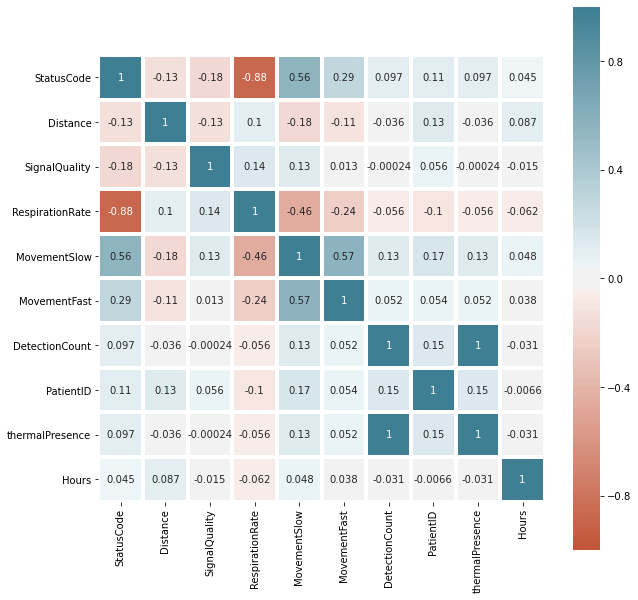

In [64]:
import seaborn as sns
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot = True, fmt='.2g',
            linewidths=3, linecolor='white',square=True, #cbar_kws= {'orientation': 'horizontal'}, 
            #mask=np.triu(df.corr())
           )
#plt.savefig("seaborn_heatmap_sqlmeanbydate.png")
print(df.corr())

In [27]:
df.columns

Index(['Timestamp', 'StatusCode', 'Distance', 'SignalQuality',
       'RespirationRate', 'MovementSlow', 'MovementFast', 'DetectionCount',
       'PatientID', 'thermalPresence', 'DateTime', 'weekday', 'Date', 'Time',
       'Mins', 'Hours', 'DMins', 'Dhours'],
      dtype='object')

In [51]:
set(df['SignalQuality'])

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [52]:
set(df0['SignalQuality'])

{0, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [53]:
df0.head(2)

,Timestamp,StatusCode,Distance,SignalQuality,RespirationRate,MovementSlow,MovementFast,DetectionCount,PatientID,thermalPresence,DateTime,weekday,Date,Time,Mins,Hours,DMins,Dhours
0,2020-01-09 04:28:36 UTC,0,1.371346,10,11.425139,17.174753,0.00000,1,5708323928145920,0,2020-01-09 04:28:36+00:00,Thursday,2020-01-09,04:28:36,04:28,04,2020-Jan-09 04:28,2020-Jan-09 04
1,2020-01-09 03:55:49 UTC,1,1.179895,10,0.000000,52.125374,10.02401,1,5708323928145920,0,2020-01-09 03:55:49+00:00,Thursday,2020-01-09,03:55:49,03:55,03,2020-Jan-09 03:55,2020-Jan-09 03


In [54]:
df.head(2)

,Timestamp,StatusCode,Distance,SignalQuality,RespirationRate,MovementSlow,MovementFast,DetectionCount,PatientID,thermalPresence,DateTime,weekday,Date,Time,Mins,Hours,DMins,Dhours
0,2020-01-09 04:28:36 UTC,0,1.371346,10,11.425139,17.174753,0.00000,1,5708323928145920,0,2020-01-09 04:28:36+00:00,Thursday,2020-01-09,04:28:36,04:28,4,2020-Jan-09 04:28,2020-Jan-09 04
1,2020-01-09 03:55:49 UTC,1,1.179895,10,0.000000,52.125374,10.02401,1,5708323928145920,0,2020-01-09 03:55:49+00:00,Thursday,2020-01-09,03:55:49,03:55,3,2020-Jan-09 03:55,2020-Jan-09 03


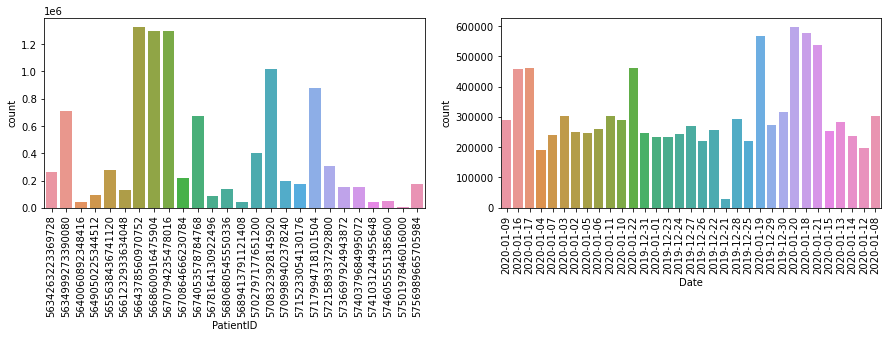

In [65]:
categorical = ['PatientID','Date']
fig, ax = plt.subplots(1, 2, figsize=(15, 3.5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

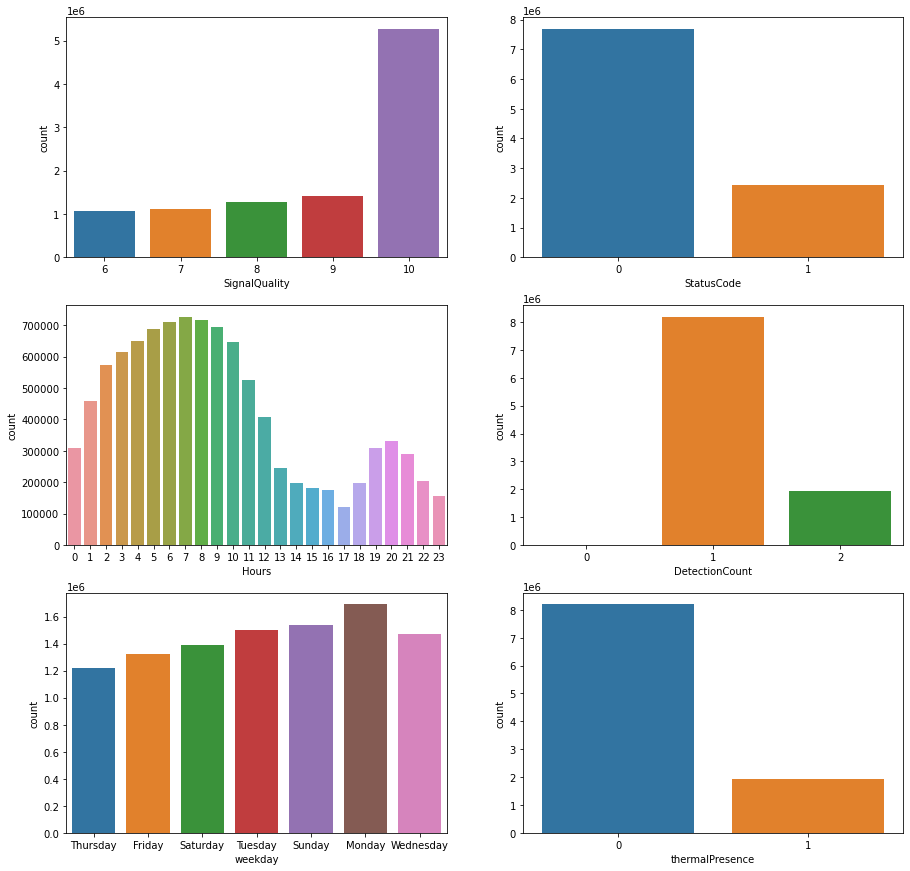

In [77]:
categorical = ['SignalQuality','StatusCode','Hours','DetectionCount','weekday','thermalPresence']
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    

02:04:12.24


<Figure size 3600x3600 with 0 Axes>

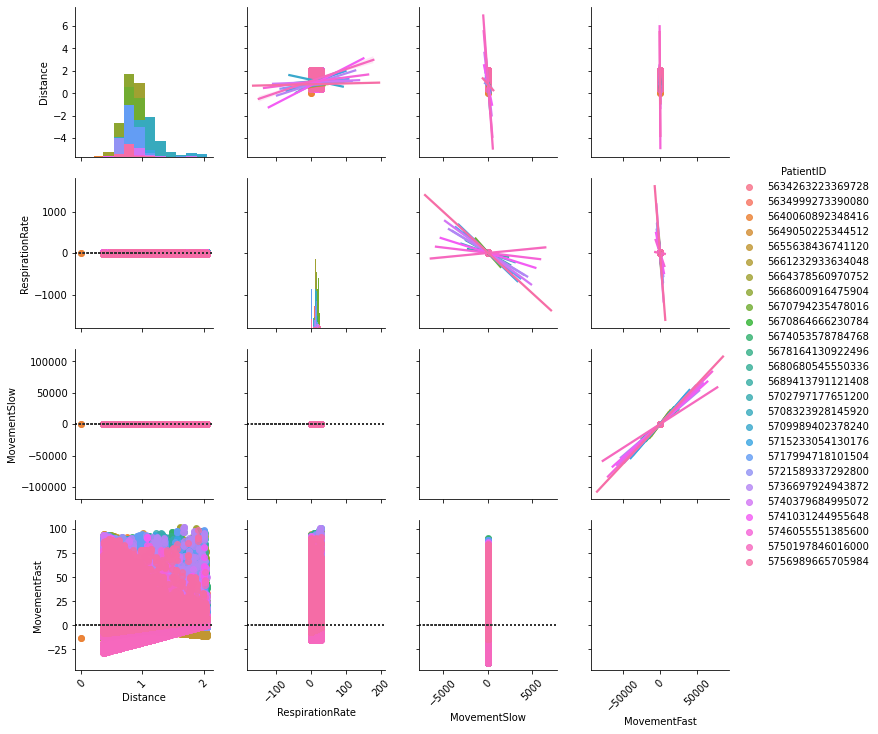

In [46]:
numerical =['Distance', 'RespirationRate', 'MovementSlow', 'MovementFast']
start = time.time()
plt.figure(figsize = (50,50))
g = sns.PairGrid(df, vars=df[numerical], hue="PatientID") 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_sqlmeanbydate.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
numerical =['Distance', 'RespirationRate', 'MovementSlow', 'MovementFast']
start = time.time()
plt.figure(figsize = (50,50))
g = sns.PairGrid(df, vars=df[numerical], hue="PatientID") 
g.map_upper(plt.scatter) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\chunxiacao\AppData\Roaming\Python\Python37\site-packages\matplotlib\contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\chunxiacao\AppData\Roaming\Python\Python37\site-packages\matplotlib\contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\User

KeyboardInterrupt: 

<Figure size 3600x3600 with 0 Axes>

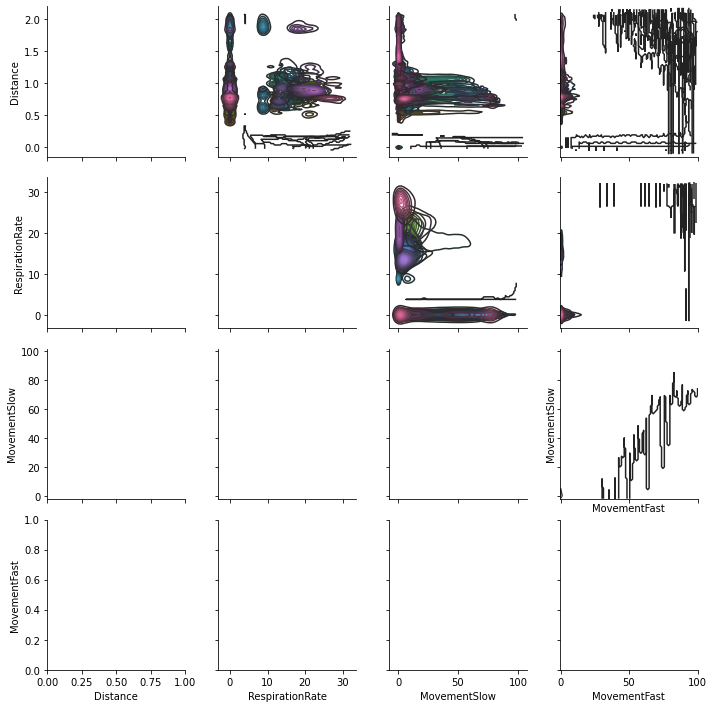

In [35]:
numerical =['Distance', 'RespirationRate', 'MovementSlow', 'MovementFast']
start = time.time()
plt.figure(figsize = (50,50))
g = sns.PairGrid(df, vars=df[numerical], hue="PatientID") 
g.map_upper(sns.kdeplot) 
g.map_lower(plt.scatter) 
g.map_diag(sns.kdeplot) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_sqlmeanbydate.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [ ]:
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train, lags=50, ax=axes[0])
plot_pacf(train, lags=50, ax=axes[1])
sns.kdeplot(df['Distance'], shade=True, color="r")

In [ ]:
sns.kdeplot(df['Distance'], shade=True, color="b")
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")

In [ ]:
numerical =['Distance', 'RespirationRate', 'MovementSlow', 'MovementFast']
start = time.time()
plt.figure(figsize = (100,100))
g = sns.pairplot(df, vars=df[numerical], hue="PatientID",diag_kind="kde", height=2.5) 
#g.map_diag(plt.hist)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_single_alldata.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

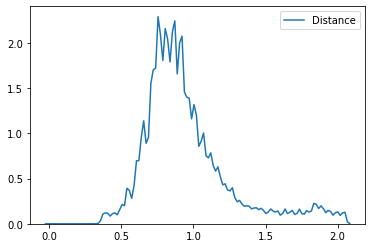

In [36]:

sns.kdeplot(df['Distance'])

Text(0.5, 1.0, 'Distance')

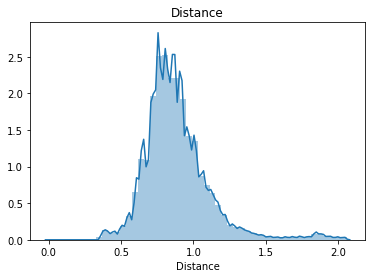

In [67]:
sns.distplot(df['Distance']).set_title('Distance')

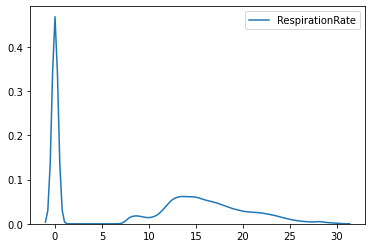

In [49]:
sns.kdeplot(df['RespirationRate'])

Text(0.5, 1.0, 'RespirationRate')

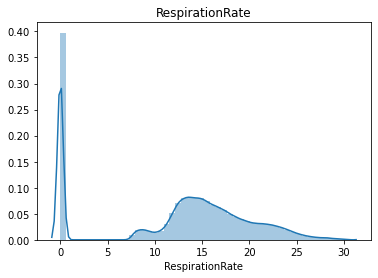

In [68]:
sns.distplot(df['RespirationRate']).set_title('RespirationRate')

Text(0.5, 1.0, 'MovementSlow')

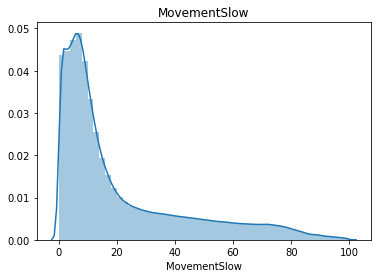

In [69]:
sns.distplot(df['MovementSlow']).set_title('MovementSlow')

Text(0.5, 1.0, 'MovementFast')

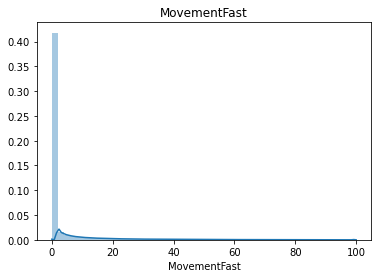

In [70]:
sns.distplot(df['MovementFast']).set_title('MovementFast')

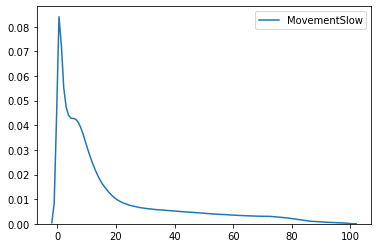

In [38]:
sns.kdeplot(df['MovementSlow'])

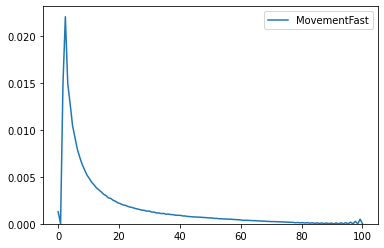

In [39]:
sns.kdeplot(df['MovementFast'])

numerical =['Distance', 'RespirationRate', 'MovementSlow', 'MovementFast']
start = time.time()
plt.figure(figsize = (100,100))
g = sns.pairplot(df, vars=df[numerical], hue="PatientID") 
#g.map_diag(plt.hist)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_single_alldata.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


numerical =['Distance', 'RespirationRate']
start = time.time()
plt.figure(figsize = (100,100))
g = sns.pairplot(df, vars=df[numerical], hue="PatientID") 
g.map_diag(plt.hist)
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)
#plt.savefig("seaborn_pair_plot_single_alldata.png")
end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))


In [47]:
df.shape

(10137846, 16)